In [1]:
from sympy import *
init_printing()
j=I

In [2]:
s = Symbol('s')
w = Symbol('omega',real = True)
a10,a20 = 1,1
a12,a22 = 1,1
a11 = 0.765367
a21 = 1.84776

In [3]:
def C1_range(C2,a1,K=1,a0=1):
    return [C2*(K-1),C2*(a1**2/4*a0+K-1)]
def R1_est(C1,C2,a1,K=1,a0=1):
    return (a1-sqrt(a1**2-4*a0*(C1/C2+1-K)))/(2*a0*(C1+C2*(1-K)))
def R2_est(C1,C2,a1,K=1,a0=1):
    return (a1+sqrt(a1**2-4*a0*(C1/C2+1-K)))/(2*a0*C1)

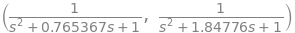

In [4]:
H1 = 1/(a12*s**2+a11*s+a10)
H2 = 1/(a22*s**2+a21*s+a20)
H1,H2

In [5]:
#Filter 1
a0,a1,a2 = a10,a11,a12
K = 1
C2 = 3.3
C1_range(C2,a1)

In [6]:
C1 = 0.47
R1,R2 = R1_est(C1,C2,a1),R2_est(C1,C2,a1)

In [7]:
H1r = K/(R1*R2*C1*C2*s**2+s*(R2*C1+R1*C1+R1*C2*(1-K))+1)
H1r

In [8]:
#Flush values
R11,R12,C11,C12=R1,R2,C1,C2

In [9]:
#Filter 2
a0,a1,a2 = a20,a21,a22
K = 1
C2 = 3.3
C1_range(C2,a1)

In [10]:
C1 = 2.2
R1,R2 = R1_est(C1,C2,a1),R2_est(C1,C2,a1)

In [11]:
H2r = K/(R1*R2*C1*C2*s**2+s*(R2*C1+R1*C1+R1*C2*(1-K))+1)
H2r

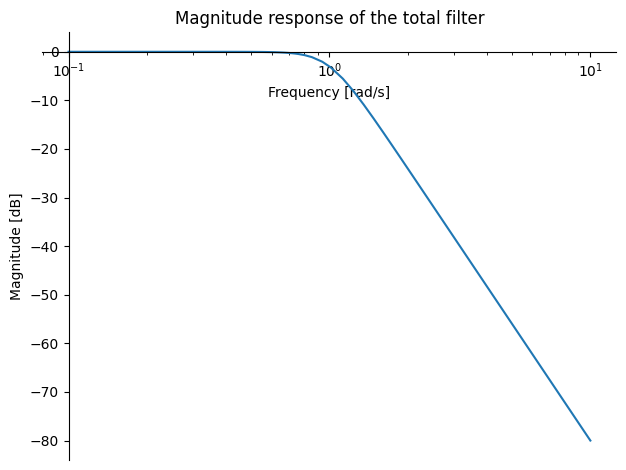

In [12]:
#Flush values
R21,R22,C21,C22=R1,R2,C1,C2

#Total filter
Hr = H1r*H2r
plot(20*log(abs(Hr).subs(s,j*w),10),(w,0.1,10),xscale='log',yscale='linear',ylabel='Magnitude [dB]',xlabel='Frequency [rad/s]',title='Magnitude response of the total filter',axis_center=(1e-1,0))
(20.*log(abs(Hr).subs(s,j*1),10)).evalf()

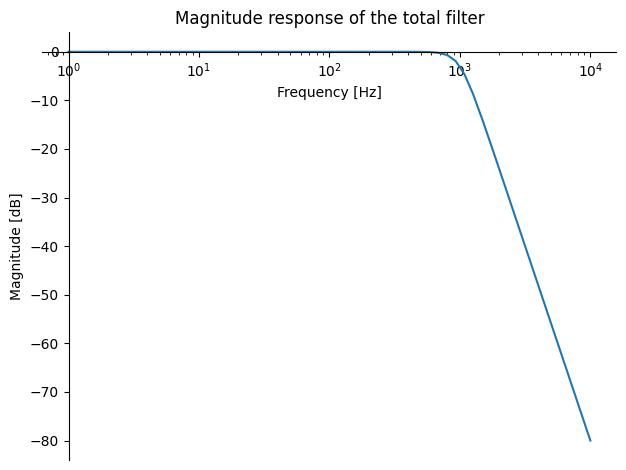

In [13]:
KF = (1000*2*pi).evalf()
C11F,C12F,C21F,C22F = C11/KF,C12/KF,C21/KF,C22/KF
HF = K/(R11*R12*C11F*C12F*s**2+s*(R12*C11F+R11*C11F+R11*C12F*(1-K))+1)*K/(R21*R22*C21F*C22F*s**2+s*(R22*C21F+R21*C21F+R21*C22F*(1-K))+1)
plot(20*log(abs(HF).subs(s,j*w*2*pi),10),(w,1,10000),xscale='log',yscale='linear',ylabel='Magnitude [dB]',xlabel='Frequency [Hz]',title='Magnitude response of the total filter',axis_center=(1,0))
(20.*log(abs(HF).subs(s,j*1e3*2*pi),10)).evalf()

In [14]:
display((C11F,C12F,C21F,C22F),(R11,R12,R21,R22))

In [15]:
KZ = C12F/3.3e-9
C11Z,C12Z,C21Z,C22Z = C11F/KZ,C12F/KZ,C21F/KZ,C22F/KZ
R11Z,R12Z,R21Z,R22Z = R11*KZ,R12*KZ,R21*KZ,R22*KZ
display((C11Z,C12Z,C21Z,C22Z),(R11Z,R12Z,R21Z,R22Z))

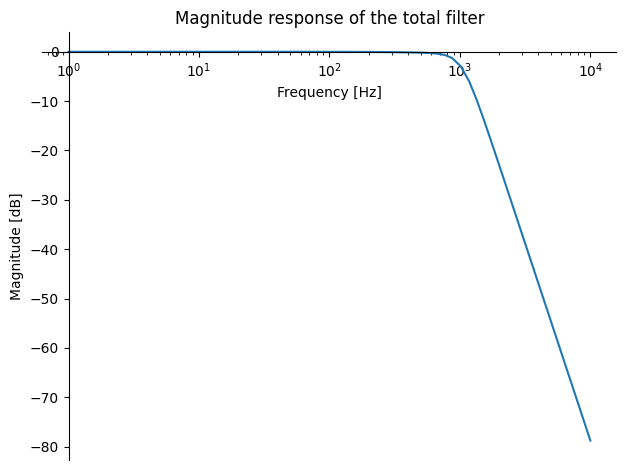

In [16]:
R11Z,R12Z,R21Z,R22Z = 1e5,1.5e5,3.3e4,1e5

H_butter = K/(R11Z*R12Z*C11Z*C12Z*s**2+s*(R12Z*C11Z+R11Z*C11Z+R11Z*C12Z*(1-K))+1)*K/(R21Z*R22Z*C21Z*C22Z*s**2+s*(R22Z*C21Z+R21Z*C21Z+R21Z*C22Z*(1-K))+1)
plot(20*log(abs(H_butter).subs(s,j*w*2*pi),10),(w,1,10000),xscale='log',yscale='linear',ylabel='Magnitude [dB]',xlabel='Frequency [Hz]',title='Magnitude response of the total filter',axis_center=(1,0))
(20.*log(abs(H_butter).subs(s,j*1e3*2*pi),10)).evalf()

In [17]:
expand(fraction(H_butter)[1])

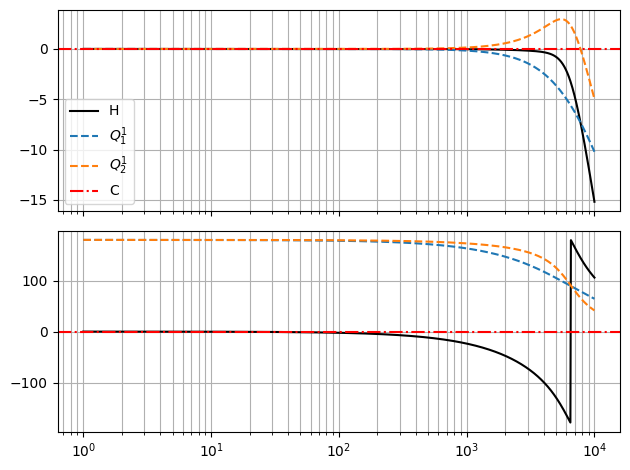

In [24]:
import toolkit as tk
tk.sallenKeyBode([1],[5.5738287e-16,9.622404e-12,8.16035e-8,0.0004101,1],(0,4))

In [23]:
atan2(im(fraction(H_butter)[1]),re(fraction(H_butter)[1])).subs(s,0)